# Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

# Importando os dados

Eu trouxe um dataset interessante que vai nos permitir analisar a relação entre temperatura e receita gerada. Este dataset contém duas colunas importantes:

<div>🌡️ Graus Celsius: Esta coluna registra a temperatura diária em graus Celsius.</div>
<div>💰 Receita gerada (R$): Esta coluna mostra a receita gerada em reais para cada dia.</div>
<br />
<div>Com esses dados, poderemos explorar como a variação na temperatura pode influenciar a receita gerada em um dia específico.</div>
<br />
<strong>Se você quiser explorar mais, <a href="https://www.kaggle.com/datasets/ahmednour/ice-cream-dataset">clique aqui</a> para ver pegar o dataset completo no kaggle.<strong> 

In [2]:
data = pd.read_csv("IceCreamData.csv")

data = data.round(1)

data.head()

,Temperature,Revenue
0,24.6,534.8
1,26.0,625.2
2,27.8,660.6
3,20.6,487.7
4,11.5,316.2


In [3]:
data.shape

(500, 2)

## Separar o dataset
Nessa trecho vamos separar a <strong>variável dependente (Receita)</strong> da <strong>variável independente (Temperatura)<strong>

Imagem de exemplo 👇

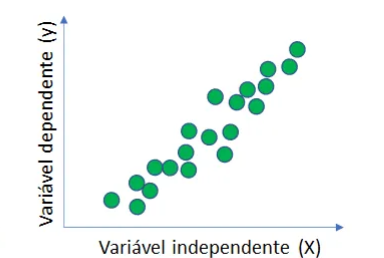

In [4]:
x = data[['Temperature']]
y = data[['Revenue']]

## Análise Gráfica
Estamos "plotando" o gráfico e, só de olhar, já podemos intuir que, conforme a temperatura aumenta, a receita também cresce. 📊📈

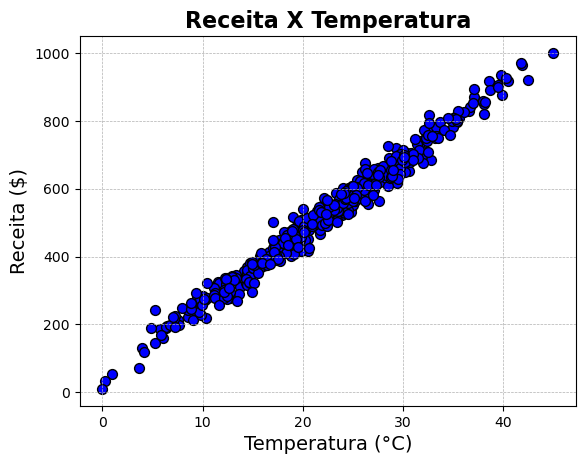

In [5]:
fig, ax = plt.subplots()

ax.scatter(x, y, color='blue', s=50, edgecolor='black')

# Título e rótulos com fontes personalizadas
plt.title('Receita X Temperatura', fontsize=16, fontweight='bold')
plt.xlabel("Temperatura (°C)", fontsize=14)
plt.ylabel("Receita ($)", fontsize=14)

# Adicionando grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Exibição do gráfico
plt.show()

# Correlação

👇 O trecho de código abaixo faz a correlação das variáveis dependentes e independentes de todo nosso conjunto de dados

<div><strong>1</strong>=> Associação positiva forte</div>
<div><strong>-1</strong>=> Associação negativa forte</div>

In [6]:
data.corr()

,Temperature,Revenue
Temperature,1.000000,0.989759
Revenue,0.989759,1.000000


# Usando algoritmo de Regressão Linear 

In [7]:
model = LinearRegression()

In [8]:
model.fit(x, y)

LinearRegression()

## Descobrindo o valor de A e B

In [9]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

print(f'A: {intercept.round(2)}')
print(f'B: {coefficient.round(2)}')

A: 44.68
B: 21.45


## Plotando o gráfico (Regressão Linear)

📈 Esse gráfico exibi a melhor reta, com base no algoritmo de regressão linear 

👇 Fórmula

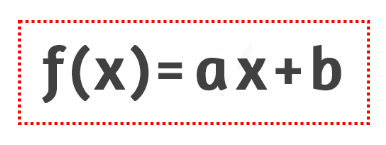

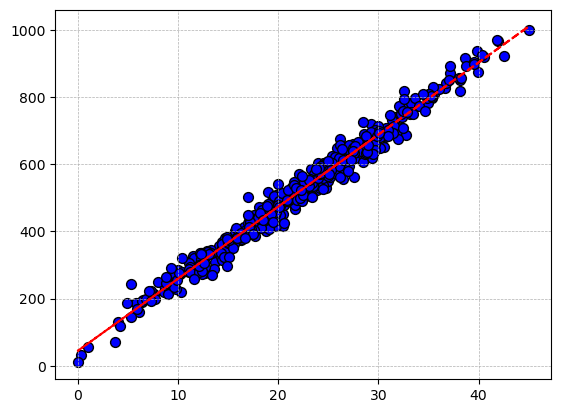

In [10]:
fig, ax = plt.subplots()

ax.scatter(x, y, color='blue', s=50, edgecolor='black')
line = coefficient*x+intercept

ax.plot(x, line, '--r')

# Adicionando grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Exibição do gráfico
plt.show()

## Plotando gráfico (Valor Aleatório)

📈 Esse gráfico exibi uma reta, com base em um algoritmo de escolher um número aleatório

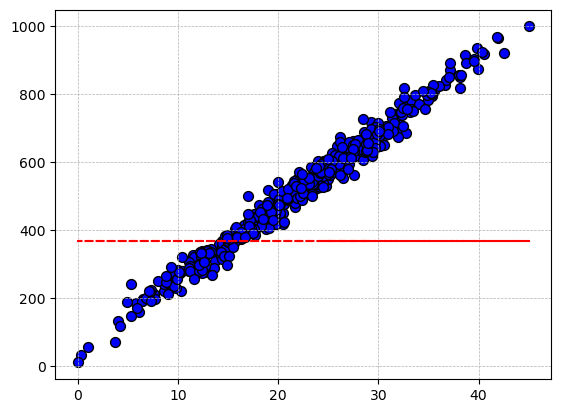

In [11]:
import numpy as np
import random

fig, ax = plt.subplots()

random_number = random.choice(y.values)

ax.scatter(x, y, color='blue', s=50, edgecolor='black')
line = np.full_like(x, random_number)

ax.plot(x, line, '--r')

# Adicionando grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Exibição do gráfico
plt.show()

# Treino e teste 

## Importando train_test_split

Através dessa importação, nós separamos a parte de treino e teste

In [12]:
from sklearn.model_selection import train_test_split

## Separando dataset de treino e teste

<div>💪 x_train é a temperatura para treino (70%)</div>
<div>🧪 x_test é a temperatura para teste (30%)</div>
<div>💪 y_train é a receita para treino (70%)</div>
<div>🧪 y_test é a receita para teste (30%)</div>

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=942)

model.fit(x_train, y_train)

LinearRegression()

## Obtendo o valor de A e B do dataset de treino e teste

In [14]:
intercepto = model.intercept_[0]
coefficiente = model.coef_[0][0]

print(f'A: {intercepto.round(2)}')
print(f'B: {coefficiente.round(2)}')

A: 38.61
B: 21.65


## Plotando gráfico 

Exibindo a reta que melhor se ajusta entre os Datapoints de teste

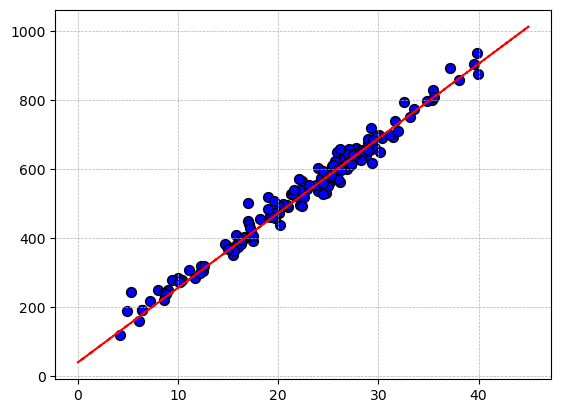

In [15]:
fig, ax = plt.subplots()

ax.scatter(x_test, y_test, color='blue', s=50, edgecolor='black')
line_2 = coefficiente*x+intercepto

ax.plot(x, line_2, '--r')

# Adicionando grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Exibição do gráfico
plt.show()

## Fazendo a previsão

In [16]:
y_pred = model_2.predict(x_test)

NameError: name 'model_2' is not defined

## Avaliando as métricas do modelo

### Soma dos Erros ao Quadrado (SSE)

SSE é a soma dos quadrados das diferenças entre valores observados e previstos, indicando a discrepância total.

### Erro Quadrático Médio (MSE)

MSE é a média da SSE, medindo a magnitude do erro ao quadrado médio dos valores previstos.

### Erro Médio Absoluto (MAE)

MAE é a média das diferenças absolutas entre valores observados e previstos, indicando a precisão média do modelo.

### Raiz do Erro Quadrático Médio (RMSE)

RMSE é a raiz quadrada do MSE, representando a magnitude do erro médio de forma mais intuitiva.

### R²-score

R²-score mede a proporção da variância nos dados observados explicada pelo modelo, variando de 0 a 1.


In [ ]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_pred - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_pred , y_test))